# Test de código Slam /Nwalkers

En este código se realizan test con el código de SLAM en donde se han variado el número de Walkers por dimensión, para obtener datos mas exactos.

read_pvfits: Input P.A.: 51.3 deg
read_pvfits: Convert frequency to velocity
Along position axis.
x range: -2.15 -- 2.15 arcsec
v range: -1.60 -- 10.20 km/s
Along velocity axis.
x range: -2.15 -- 2.15 arcsec
v range: -1.60 -- 10.20 km/s
Derived points in pvanalysis_Oph1_C18O_mTTT_tr3.edge.dat and pvanalysis_Oph1_C18O_mTTT_tr3.ridge.dat.


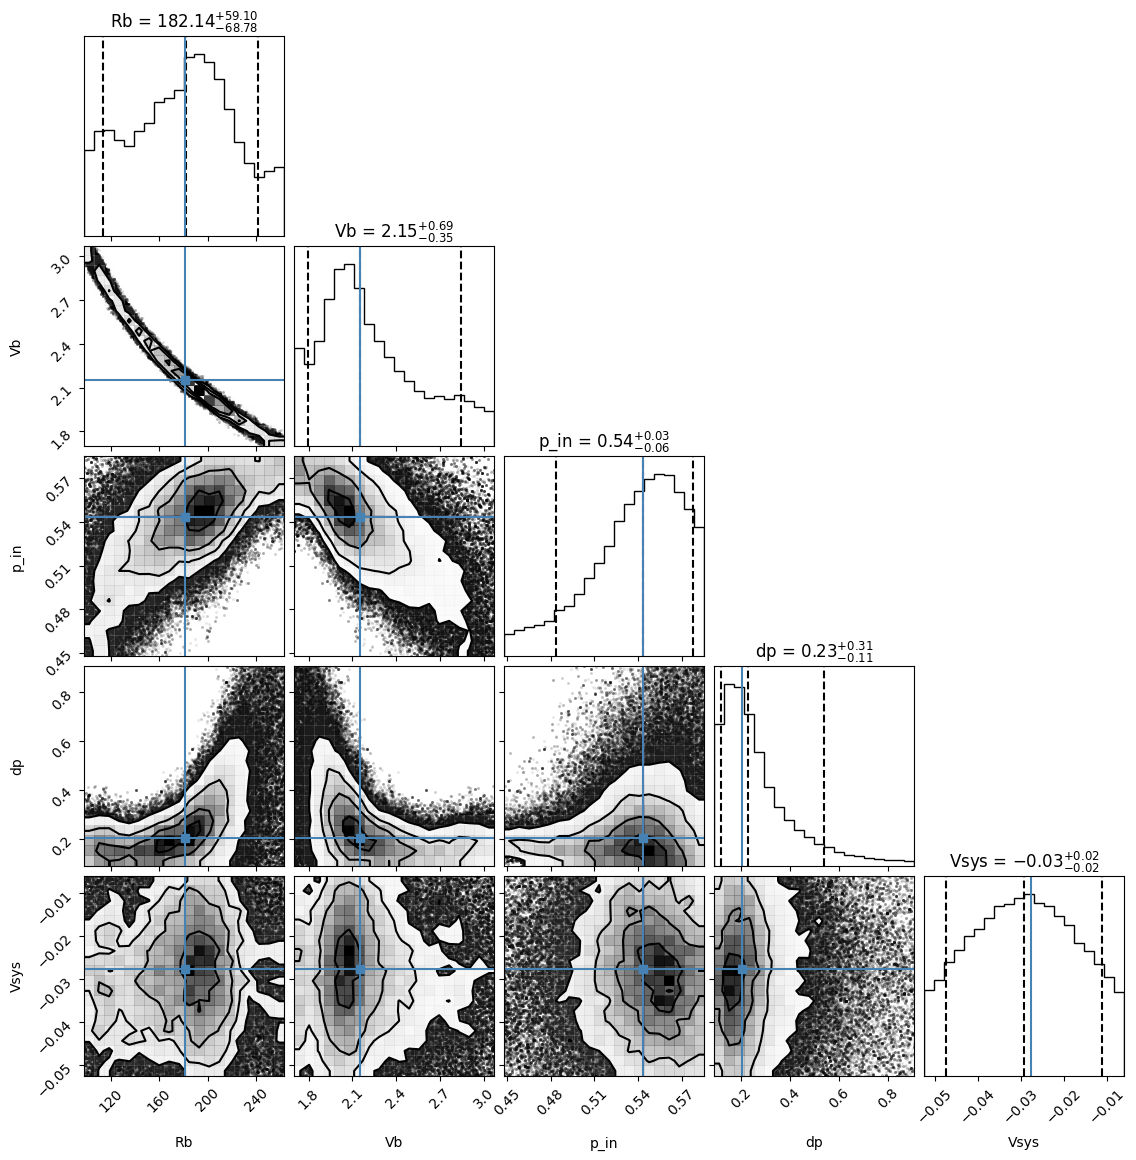

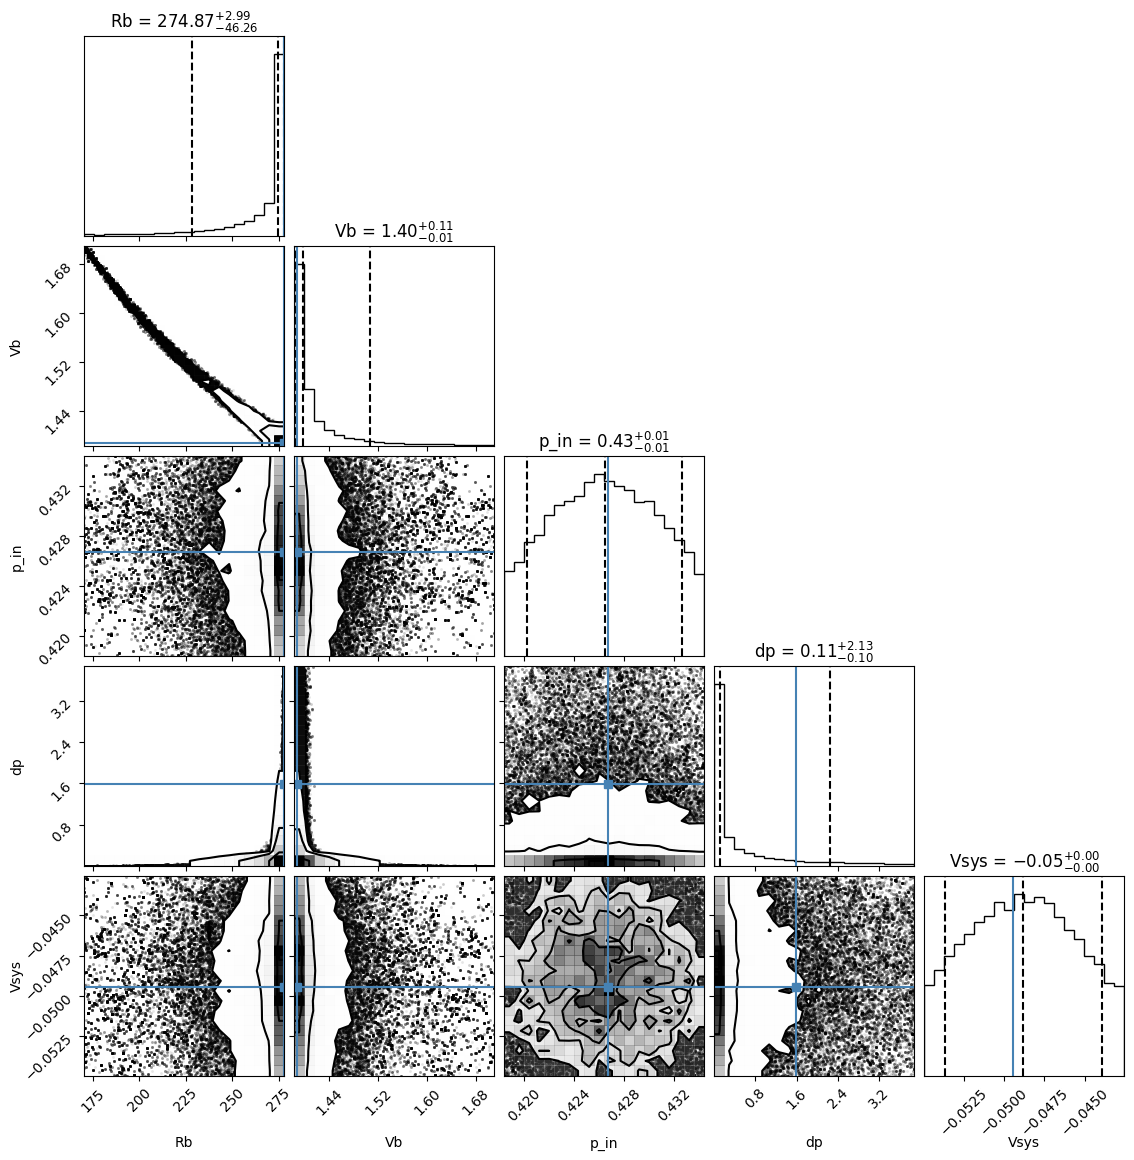

Corner plots in pvanalysis_Oph1_C18O_mTTT_tr3.corner_e.png and pvanalysis_Oph1_C18O_mTTT_tr3.corner_r.png
--- Edge ---
R_b   = 182.14 +/- 63.94 au
V_b   = 2.152 +/- 0.523 km/s
p_in  = 0.543 +/- 0.047
dp    = 0.226 +/- 0.212
v_sys = 2.271 +/- 0.018
r     = 60.11 --- 278.00 au
v     = 1.525 --- 3.900 km/s
M_in  = 1.170 +/- 0.675 Msun
M_out = 0.846 +/- 0.647 Msun
M_b   = 1.063 +/- 0.637 Msun
--- Ridge ---
R_b   = 274.87 +/- 24.63 au
V_b   = 1.397 +/- 0.061 km/s
p_in  = 0.426 +/- 0.006
dp    = 0.108 +/- 1.118
v_sys = 2.251 +/- 0.005
r     = 24.03 --- 278.00 au
v     = 1.339 --- 3.900 km/s
M_in  = 0.472 +/- 0.067 Msun
M_out = 0.676 +/- 0.093 Msun
M_b   = 0.676 +/- 0.085 Msun


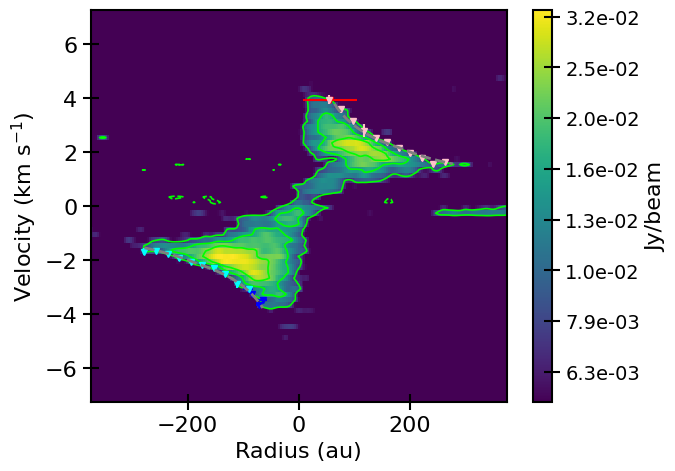

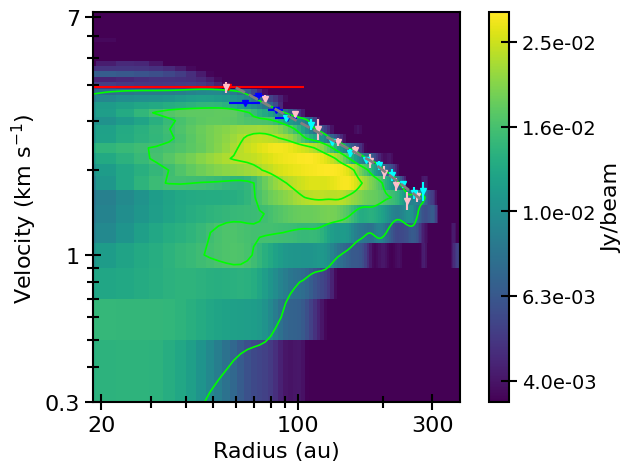

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pvanalysis import PVAnalysis
import os

#######Ingresamos los outputs
fitsfile = './Ophiucus 1/Oph1_C18O_pvdiagram.fits'
outname = 'pvanalysis_Oph1_C18O_mTTT_tr3'  # file name header for outputs
incl = 71 # deg
vsys = 2.3 # km/s
dist = 139.  # pc
rms = 2.56e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-300, 0, 0, 300] # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-4, -1.5, 0.5, 8]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66

#Corremos Slam
        
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
fit_result=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

read_pvfits: Input P.A.: 51.3 deg
read_pvfits: Convert frequency to velocity
Along position axis.
x range: -2.63 -- -0.03 arcsec
v range: -3.60 -- 2.20 km/s
Along velocity axis.
x range: -2.63 -- -0.03 arcsec
v range: -3.60 -- 2.20 km/s
Derived points in pvanalysis_Oph1_12CO_mTTT_tr3_vlim_1.edge.dat and pvanalysis_Oph1_12CO_mTTT_tr3_vlim_1.ridge.dat.


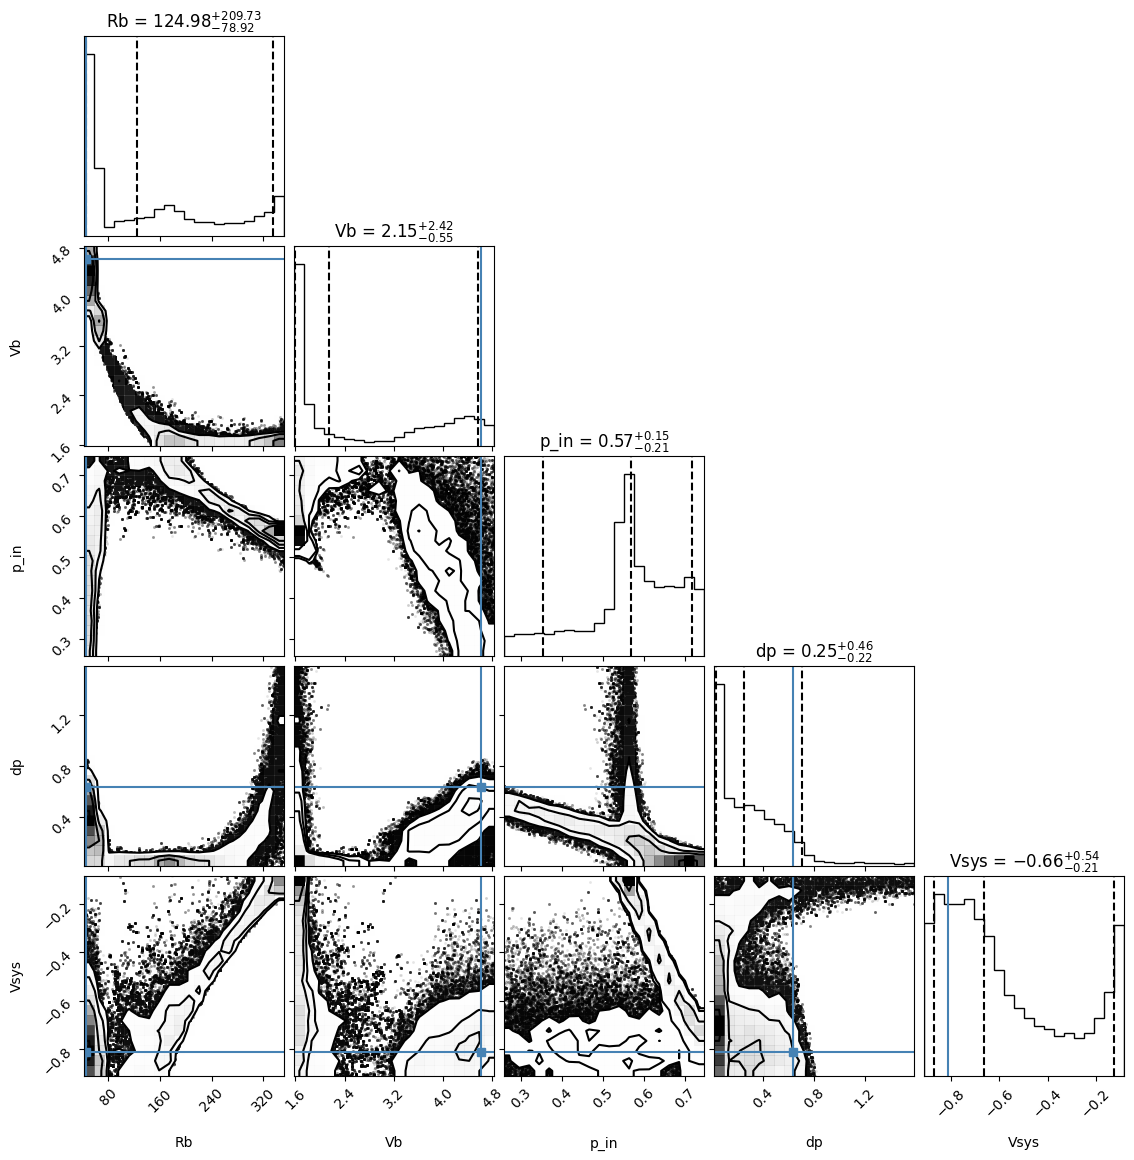

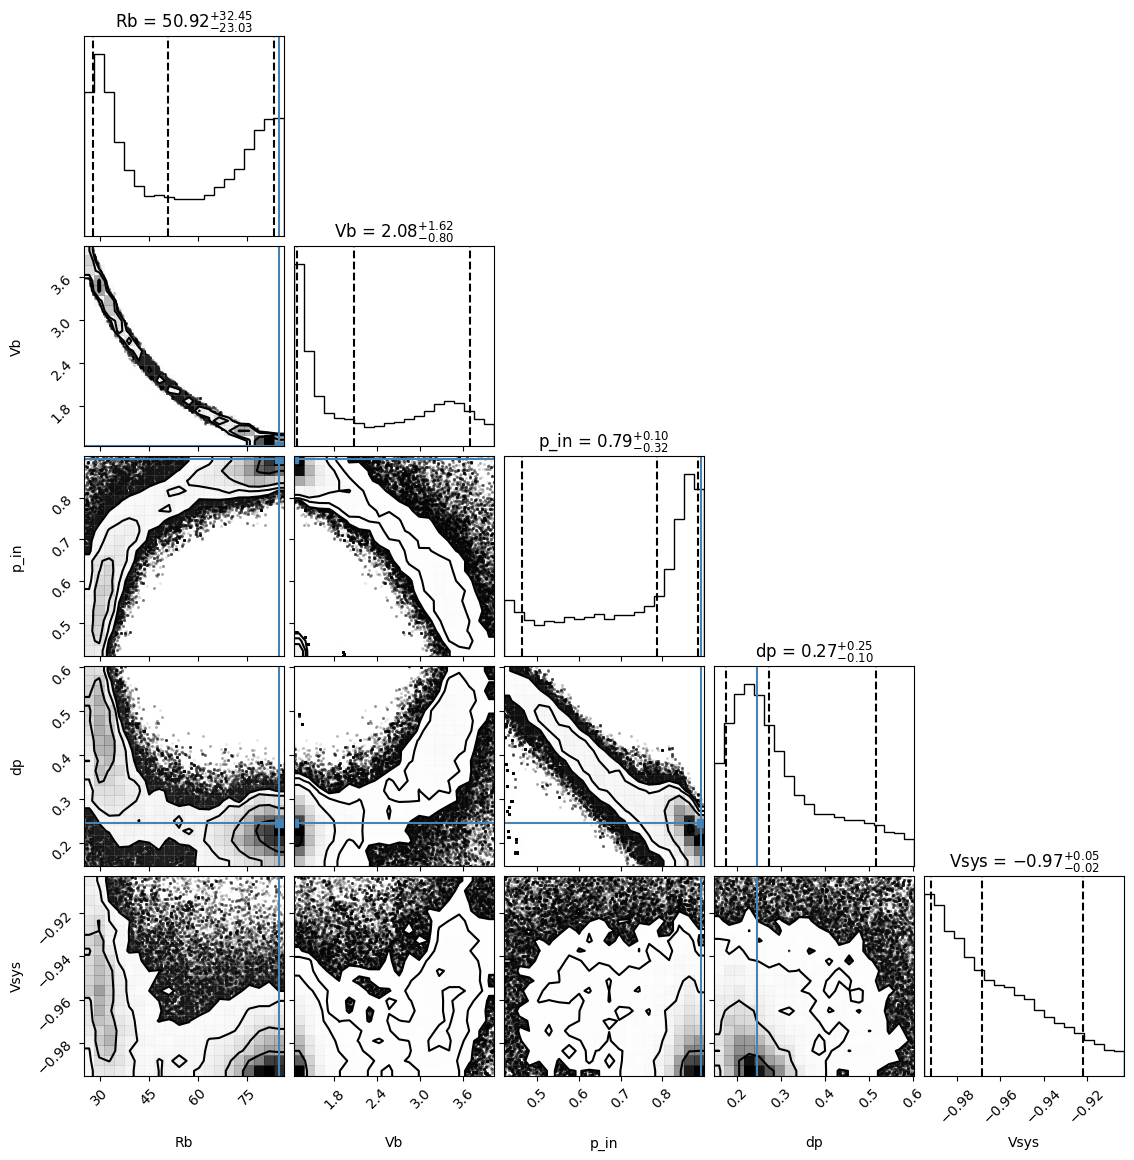

Corner plots in pvanalysis_Oph1_12CO_mTTT_tr3_vlim_1.corner_e.png and pvanalysis_Oph1_12CO_mTTT_tr3_vlim_1.corner_r.png
--- Edge ---
R_b   = 124.98 +/- 144.32 au
V_b   = 2.146 +/- 1.487 km/s
p_in  = 0.569 +/- 0.182
dp    = 0.251 +/- 0.340
v_sys = 1.637 +/- 0.372
r     = 17.52 --- 364.88 au
v     = 0.228 --- 5.900 km/s
M_in  = 0.951 +/- 1.707 Msun
M_out = 0.366 +/- 3.749 Msun
M_b   = 0.726 +/- 1.309 Msun
--- Ridge ---
R_b   = 50.92 +/- 27.74 au
V_b   = 2.075 +/- 1.206 km/s
p_in  = 0.786 +/- 0.211
dp    = 0.272 +/- 0.171
v_sys = 1.332 +/- 0.035
r     = 11.10 --- 364.88 au
v     = -0.710 --- 5.900 km/s
M_in  = 0.660 +/- 0.664 Msun
M_out = 0.031 +/- -0.022 Msun
M_b   = 0.277 +/- 0.355 Msun


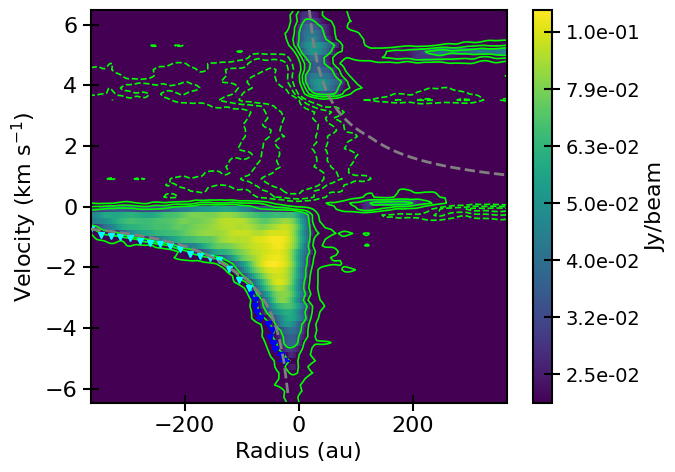

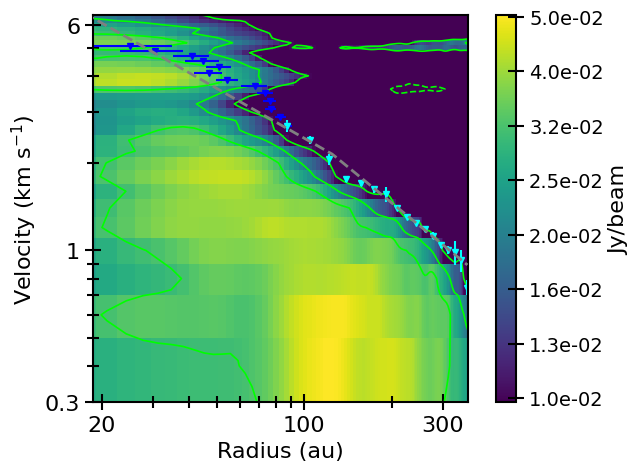

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pvanalysis import PVAnalysis
import os
#######Ingresamos los outputs
'-------- INPUTS --------'
fitsfile = './Ophiucus 1/Oph1_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph1_12CO_mTTT_tr3_vlim_1'  # file name header for outputs
incl = 71.  # deg
vsys = 2.3# km/s
dist = 139.  # pc
rms = 3.42e-3  # Jy/beam
thr = 5.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-380, 0, 0,0]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-6,0,0,0]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66

#Corremos Slam
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
fit_result=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


read_pvfits: Input P.A.: 51.3 deg
read_pvfits: Convert frequency to velocity
Along position axis.
x range: -3.10 -- 1.50 arcsec
v range: -2.60 -- 11.20 km/s
Along velocity axis.
x range: -3.10 -- 1.50 arcsec
v range: -2.60 -- 11.20 km/s
Derived points in pvanalysis_Oph1_13CO_mTTT_tr3.edge.dat and pvanalysis_Oph1_13CO_mTTT_tr3.ridge.dat.


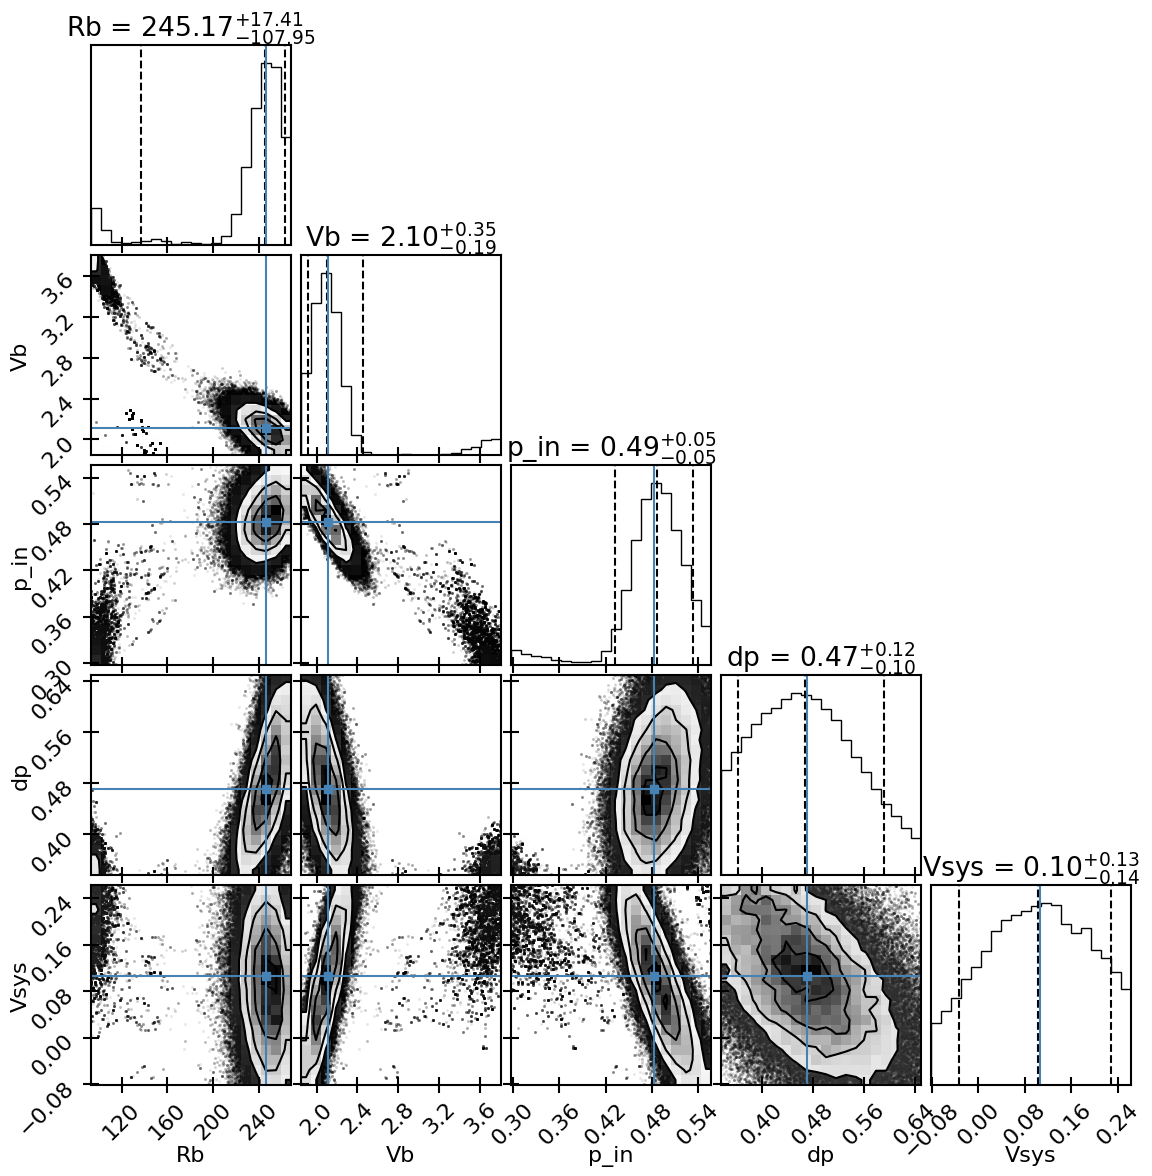

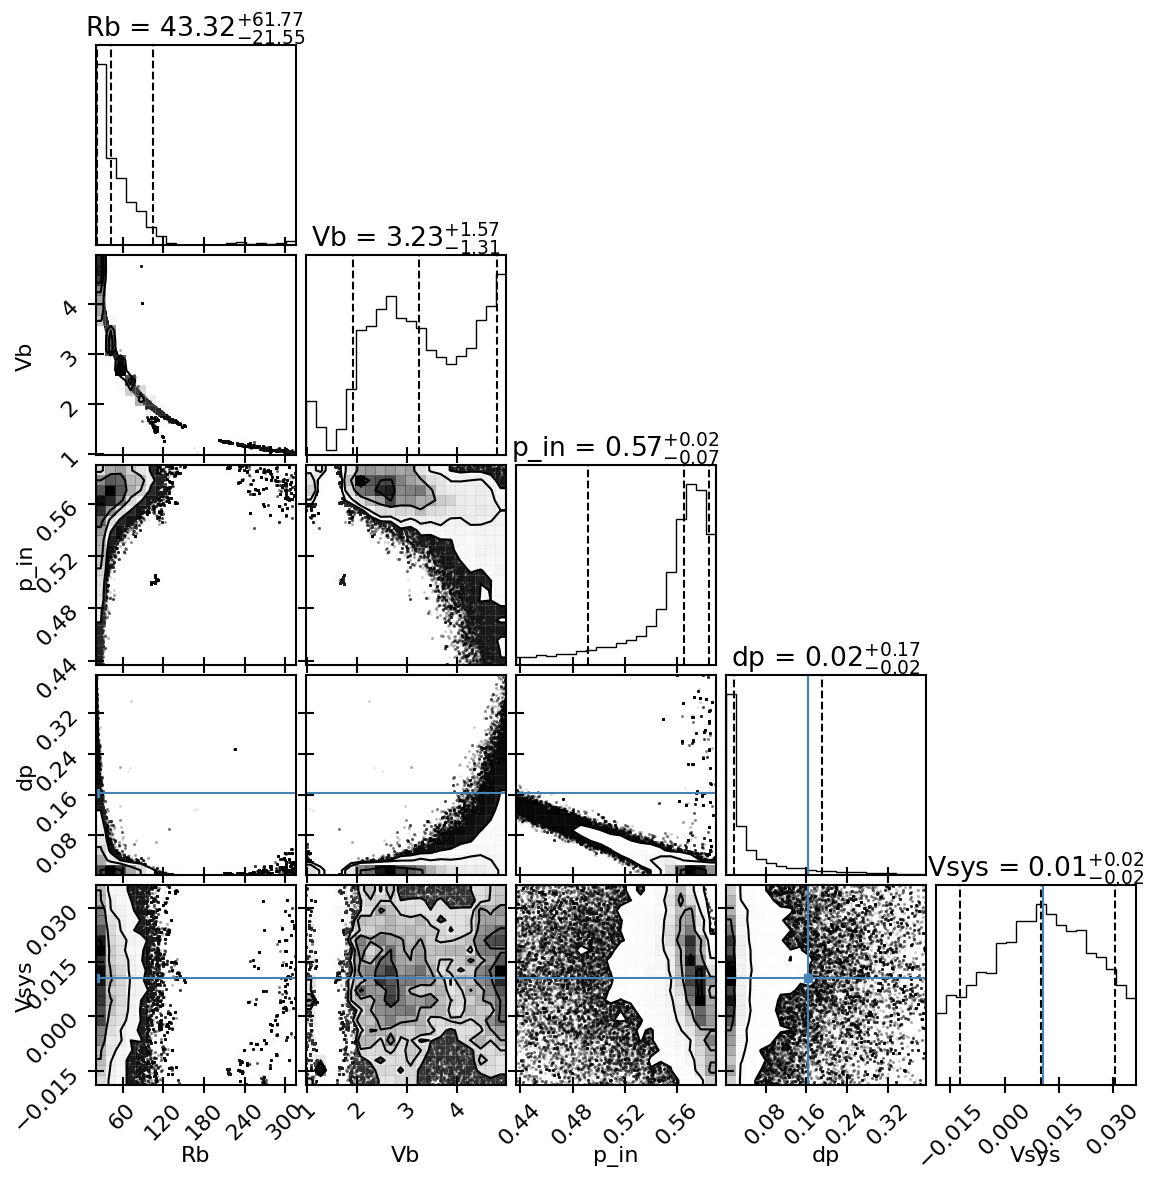

Corner plots in pvanalysis_Oph1_13CO_mTTT_tr3.corner_e.png and pvanalysis_Oph1_13CO_mTTT_tr3.corner_r.png
--- Edge ---
R_b   = 245.17 +/- 62.68 au
V_b   = 2.105 +/- 0.270 km/s
p_in  = 0.486 +/- 0.051
dp    = 0.467 +/- 0.114
v_sys = 2.402 +/- 0.131
r     = 41.45 --- 430.90 au
v     = 1.331 --- 5.100 km/s
M_in  = 1.305 +/- 0.541 Msun
M_out = 0.821 +/- 0.461 Msun
M_b   = 1.370 +/- 0.496 Msun
--- Ridge ---
R_b   = 43.32 +/- 41.66 au
V_b   = 3.233 +/- 1.440 km/s
p_in  = 0.565 +/- 0.046
dp    = 0.019 +/- 0.094
v_sys = 2.310 +/- 0.021
r     = 19.41 --- 430.90 au
v     = 0.855 --- 5.100 km/s
M_in  = 0.634 +/- 0.789 Msun
M_out = 0.388 +/- 0.580 Msun
M_b   = 0.571 +/- 0.748 Msun


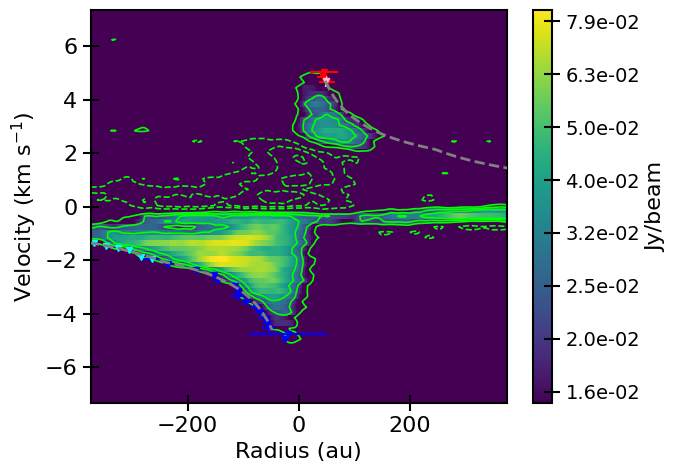

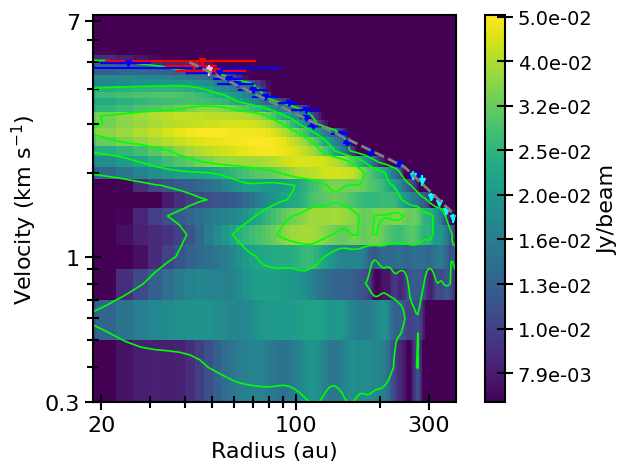

In [3]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 1/Oph1_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph1_13CO_mTTT_tr3'  # file name header for outputs
incl = 71.  # deg
vsys = 2.3# km/s
dist = 139.  # pc
rms = 3.65e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-450, 0, 0, 210]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-5, 2.5,4.5 , 9]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66

#Corremos Slam
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
fit_result=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


read_pvfits: Input P.A.: 51.3 deg
read_pvfits: Convert frequency to velocity
Along position axis.
x range: -1.78 -- 1.78 arcsec
v range: -3.60 -- 10.20 km/s
Along velocity axis.
x range: -1.78 -- 1.78 arcsec
v range: -3.60 -- 10.20 km/s
Derived points in pvanalysis_Oph1_C17O_mTTT_tr3.edge.dat and pvanalysis_Oph1_C17O_mTTT_tr3.ridge.dat.


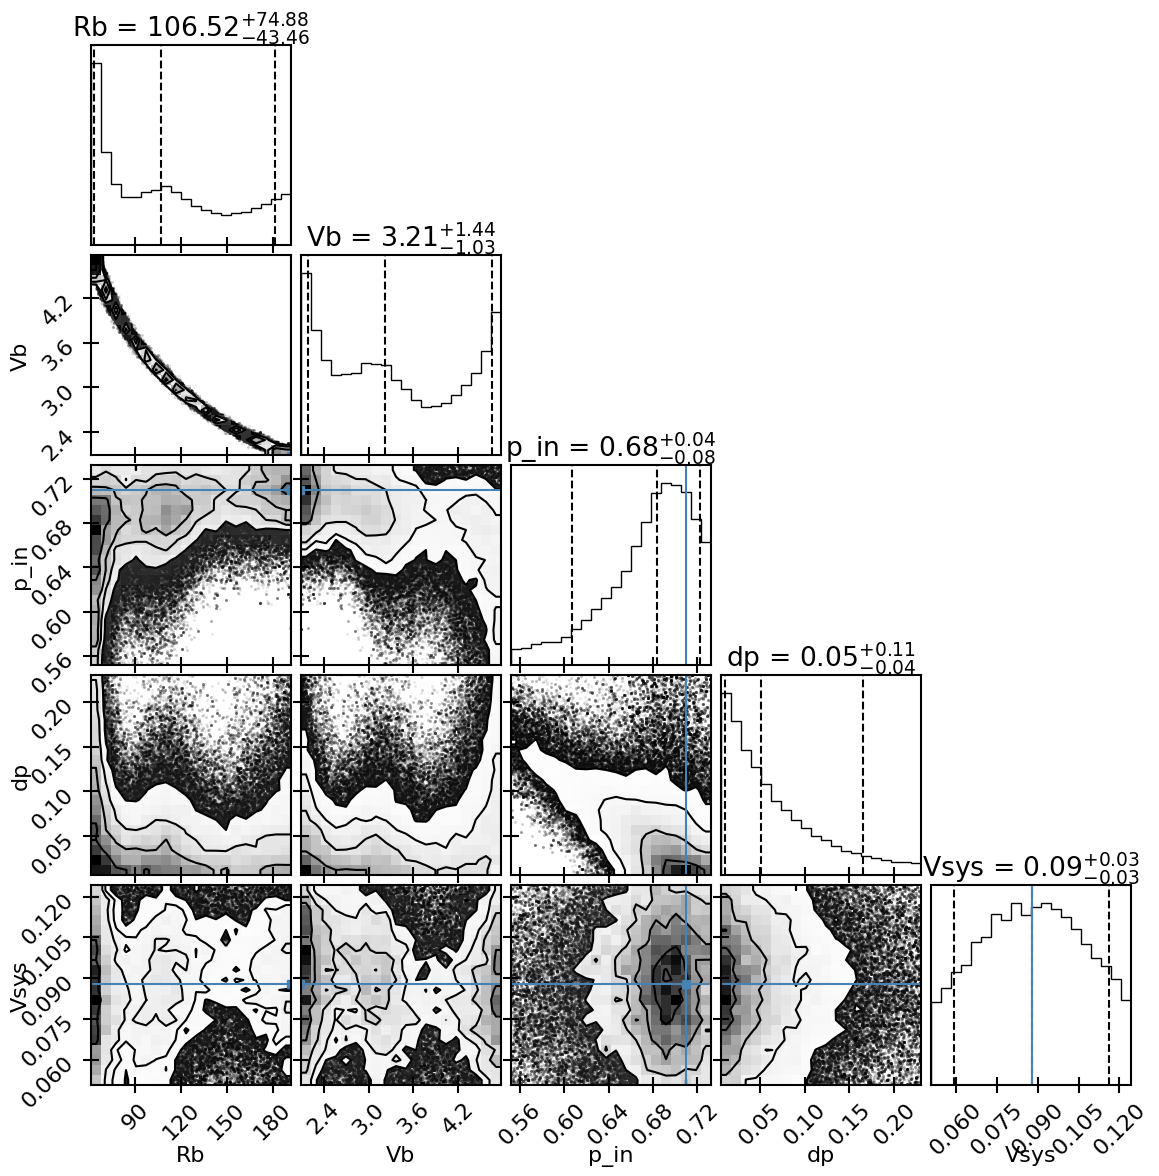

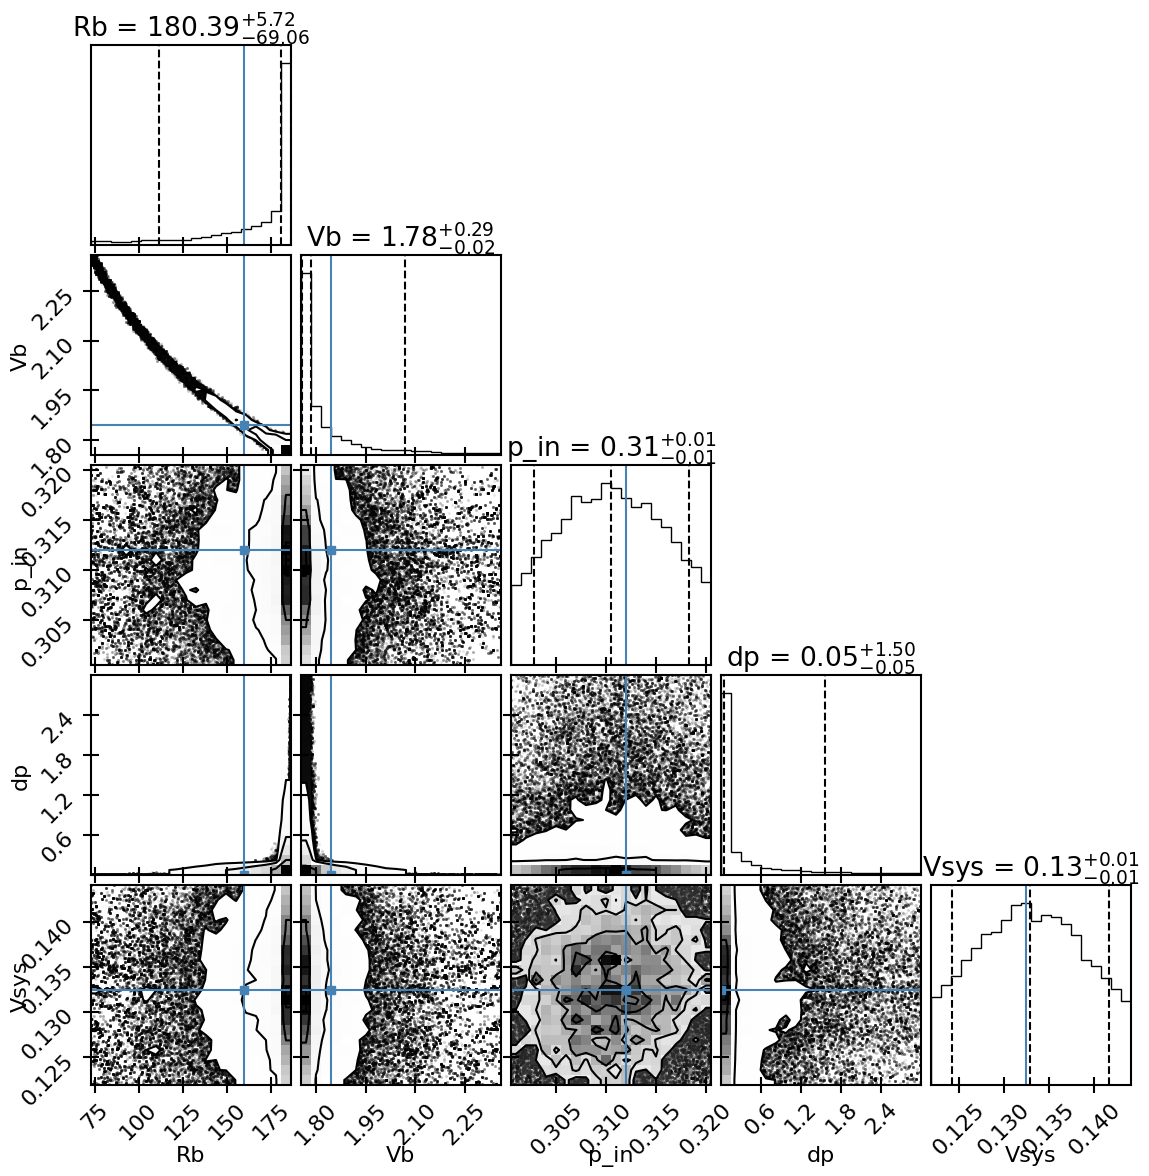

Corner plots in pvanalysis_Oph1_C17O_mTTT_tr3.corner_e.png and pvanalysis_Oph1_C17O_mTTT_tr3.corner_r.png
--- Edge ---
R_b   = 106.52 +/- 59.17 au
V_b   = 3.214 +/- 1.233 km/s
p_in  = 0.684 +/- 0.058
dp    = 0.052 +/- 0.076
v_sys = 2.388 +/- 0.029
r     = 59.03 --- 219.62 au
v     = 1.976 --- 4.900 km/s
M_in  = 1.723 +/- 1.364 Msun
M_out = 0.987 +/- 1.065 Msun
M_b   = 1.387 +/- 1.314 Msun
--- Ridge ---
R_b   = 180.39 +/- 37.39 au
V_b   = 1.783 +/- 0.155 km/s
p_in  = 0.310 +/- 0.008
dp    = 0.054 +/- 0.777
v_sys = 2.433 +/- 0.009
r     = 7.60 --- 186.26 au
v     = 1.895 --- 4.900 km/s
M_in  = 0.218 +/- 0.078 Msun
M_out = 0.730 +/- 0.160 Msun
M_b   = 0.723 +/- 0.196 Msun


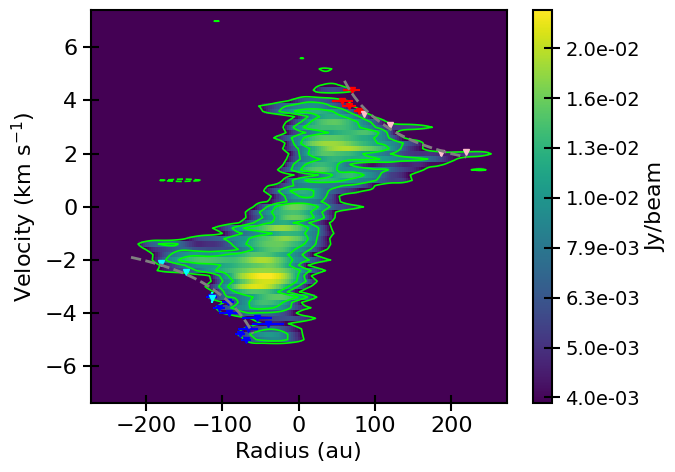

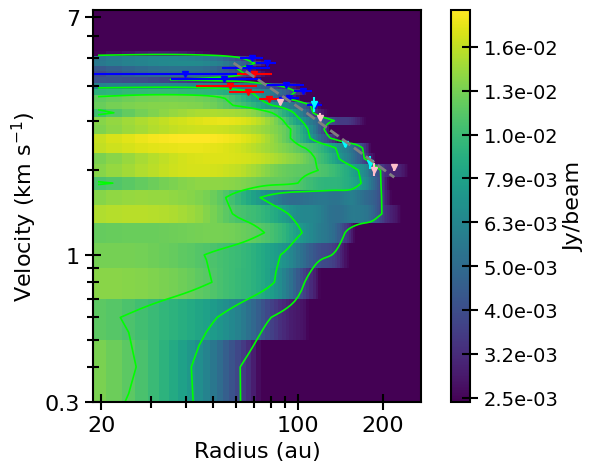

In [3]:

'-------- INPUTS --------'
fitsfile = './Ophiucus 1/Oph1_C17O_pvdiagram.fits'
outname = 'pvanalysis_Oph1_C17O_mTTT_tr3'  # file name header for outputs
incl = 71.  # deg
vsys = 2.3# km/s
dist = 139.  # pc
rms = 1.22e-3  # Jy/beam
thr = 3.5  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-250, 120, 180, 250]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-6, 0, 0, 8]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66
'------------------------'

#Corremos Slam
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
fit_result=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


read_pvfits: Input P.A.: 51.3 deg
read_pvfits: Convert frequency to velocity
Along position axis.
x range: -1.78 -- 1.78 arcsec
v range: 2.40 -- 10.20 km/s
Along velocity axis.
x range: -1.78 -- 1.78 arcsec
v range: 2.40 -- 10.20 km/s
Derived points in pvanalysis_Oph1_C17O_mTTT_tr3.edge.dat and pvanalysis_Oph1_C17O_mTTT_tr3.ridge.dat.


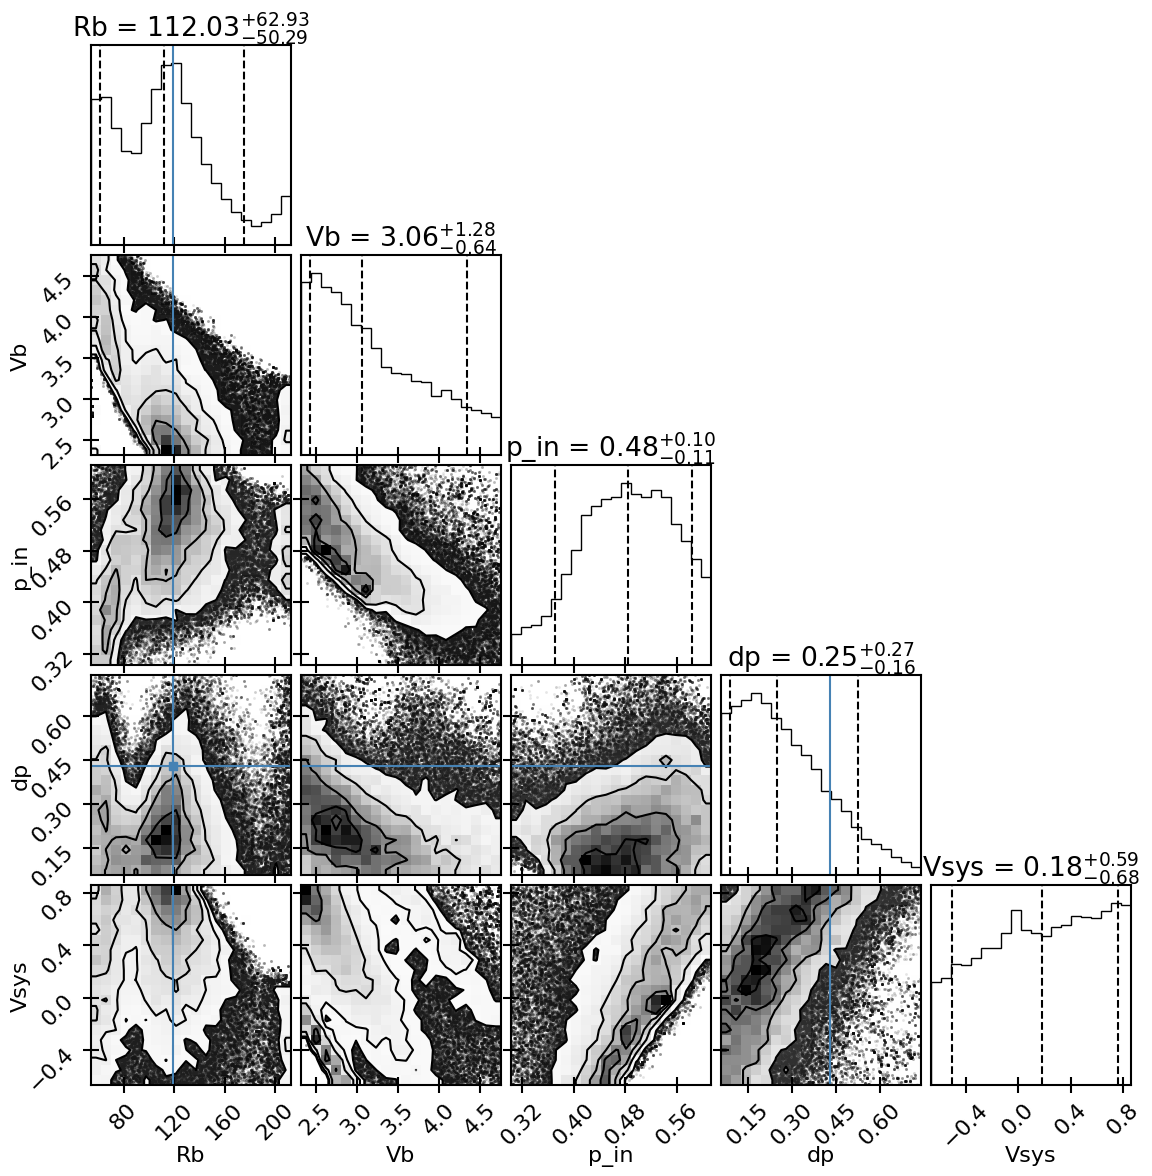

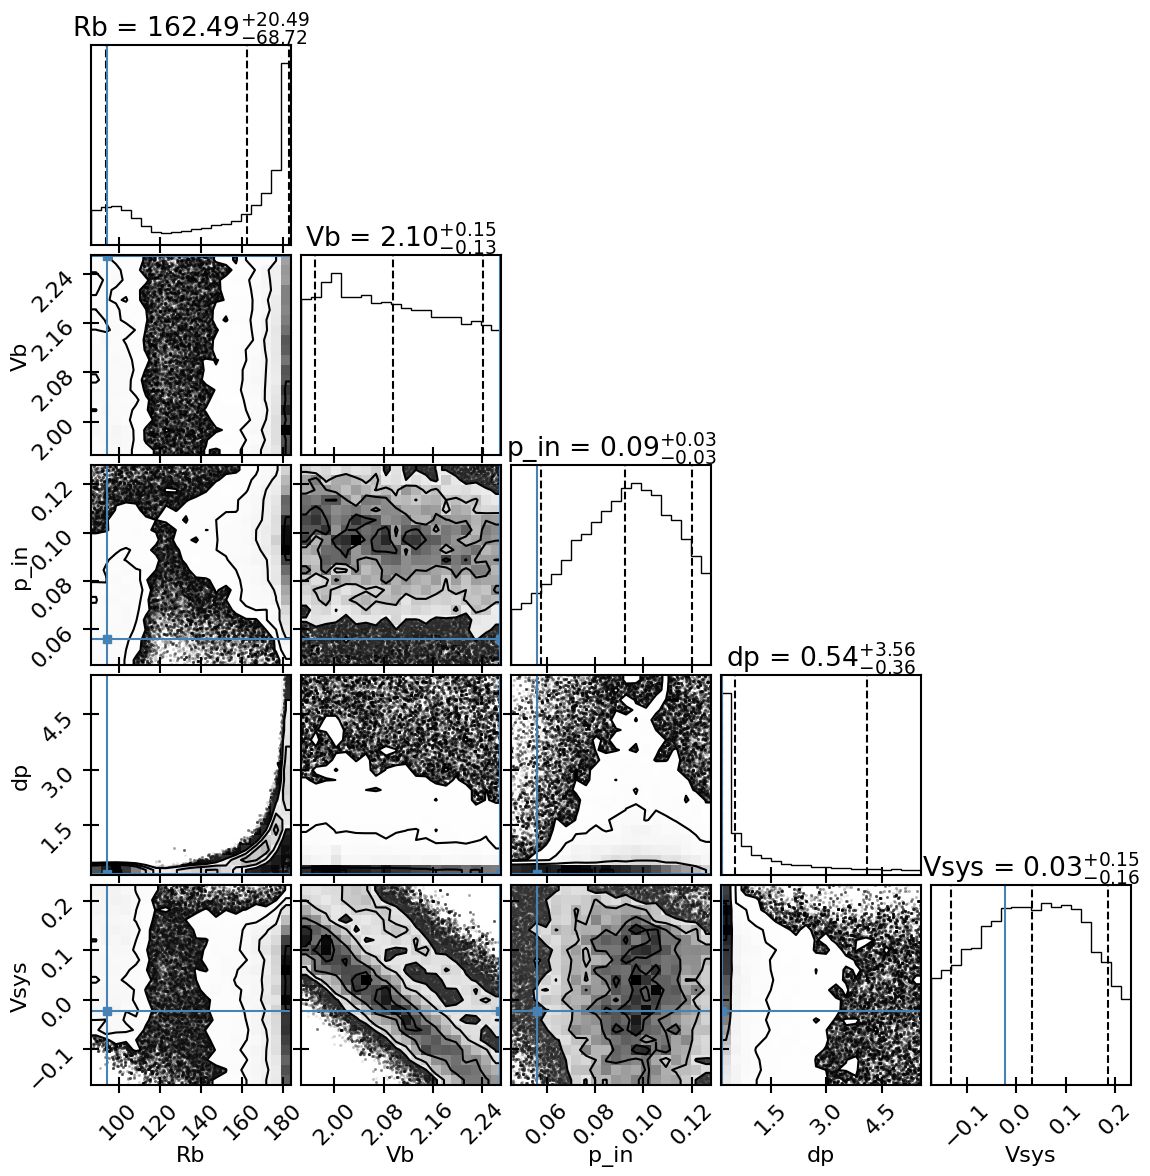

Corner plots in pvanalysis_Oph1_C17O_mTTT_tr3.corner_e.png and pvanalysis_Oph1_C17O_mTTT_tr3.corner_r.png
--- Edge ---
R_b   = 112.03 +/- 56.61 au
V_b   = 3.062 +/- 0.957 km/s
p_in  = 0.484 +/- 0.106
dp    = 0.251 +/- 0.218
v_sys = 2.480 +/- 0.635
r     = 33.13 --- 219.62 au
v     = 2.046 --- 5.700 km/s
M_in  = 1.273 +/- 1.139 Msun
M_out = 0.965 +/- 1.082 Msun
M_b   = 1.324 +/- 1.064 Msun
--- Ridge ---
R_b   = 162.49 +/- 44.61 au
V_b   = 2.096 +/- 0.136 km/s
p_in  = 0.092 +/- 0.031
dp    = 0.538 +/- 1.960
v_sys = 2.331 +/- 0.159
r     = 62.74 --- 186.26 au
v     = 1.954 --- 2.320 km/s
M_in  = 0.414 +/- 0.461 Msun
M_out = 0.868 +/- 0.574 Msun
M_b   = 0.900 +/- 0.273 Msun


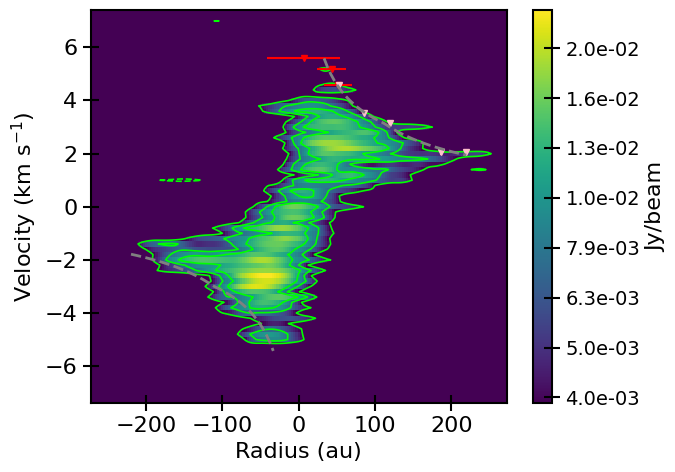

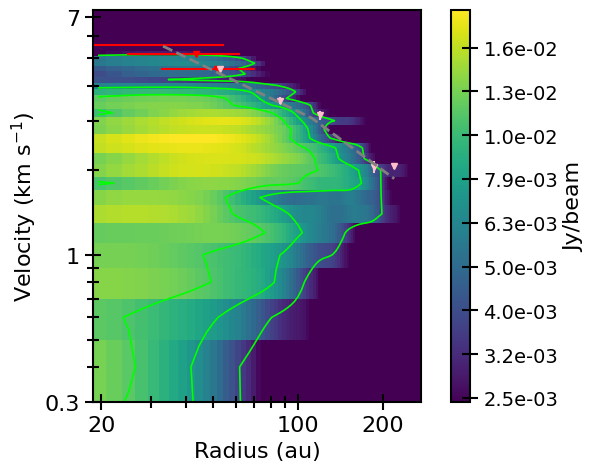

In [8]:

'-------- INPUTS --------'
fitsfile = './Ophiucus 1/Oph1_C17O_pvdiagram.fits'
outname = 'pvanalysis_Oph1_C17O_mTTT_tr3'  # file name header for outputs
incl = 71.  # deg
vsys = 2.3# km/s
dist = 139.  # pc
rms = 1.22e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-250, 120, 180, 250]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([0, 0, 0, 8]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66
'------------------------'

#Corremos Slam
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
fit_result=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

read_pvfits: Input P.A.: 51.3 deg
read_pvfits: Convert frequency to velocity
Along position axis.
x range: -1.78 -- 1.78 arcsec
v range: -1.60 -- 2.20 km/s
Along velocity axis.
x range: -1.78 -- 1.78 arcsec
v range: -1.60 -- 2.20 km/s
Derived points in pvanalysis_Oph1_C17O_mTTT_tr3.edge.dat and pvanalysis_Oph1_C17O_mTTT_tr3.ridge.dat.


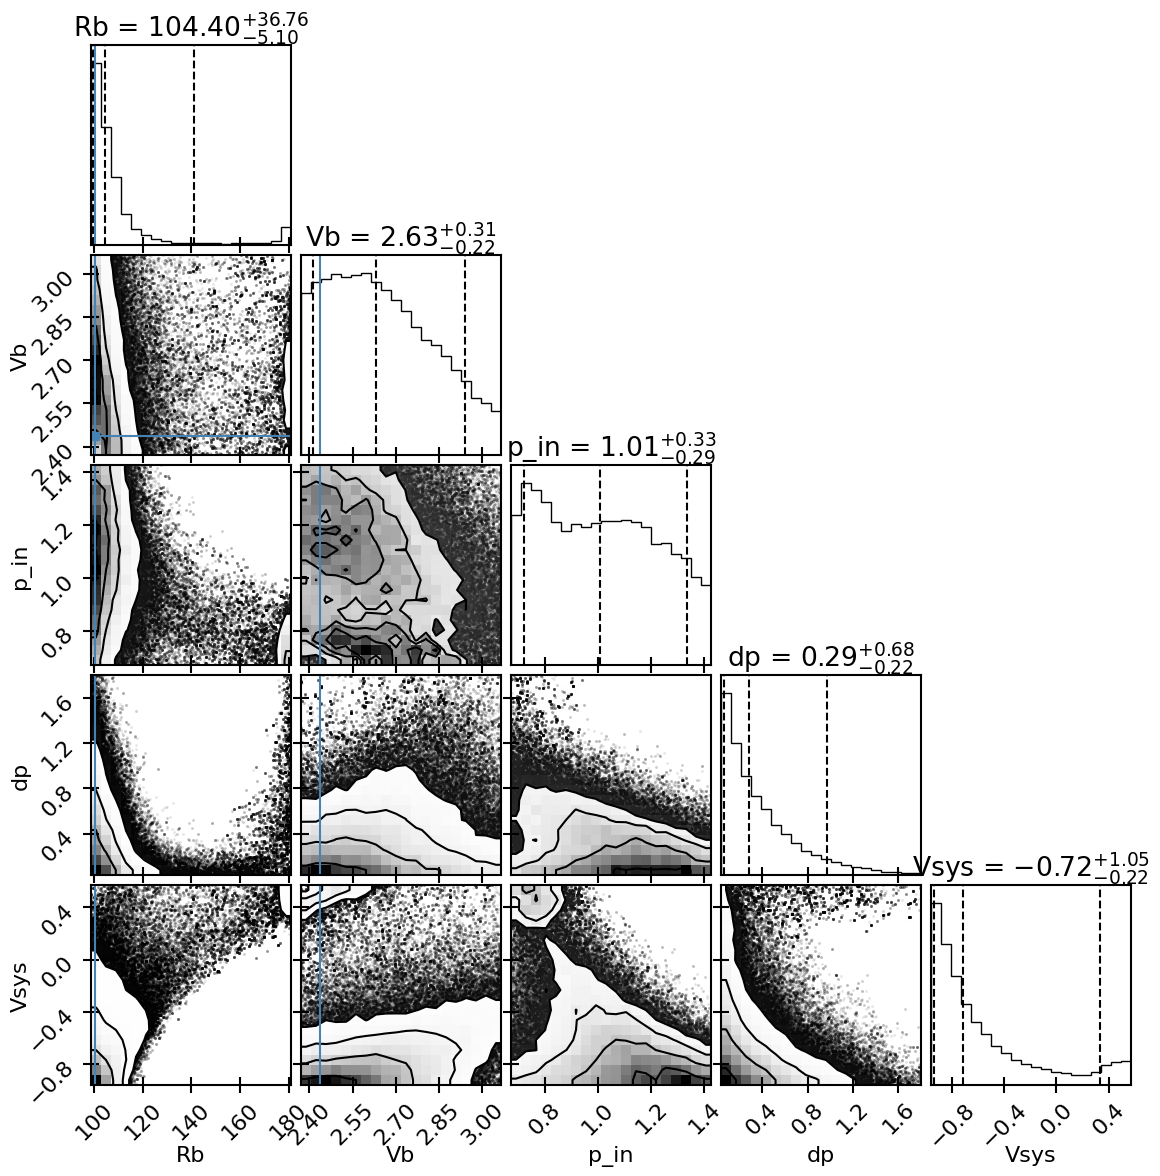

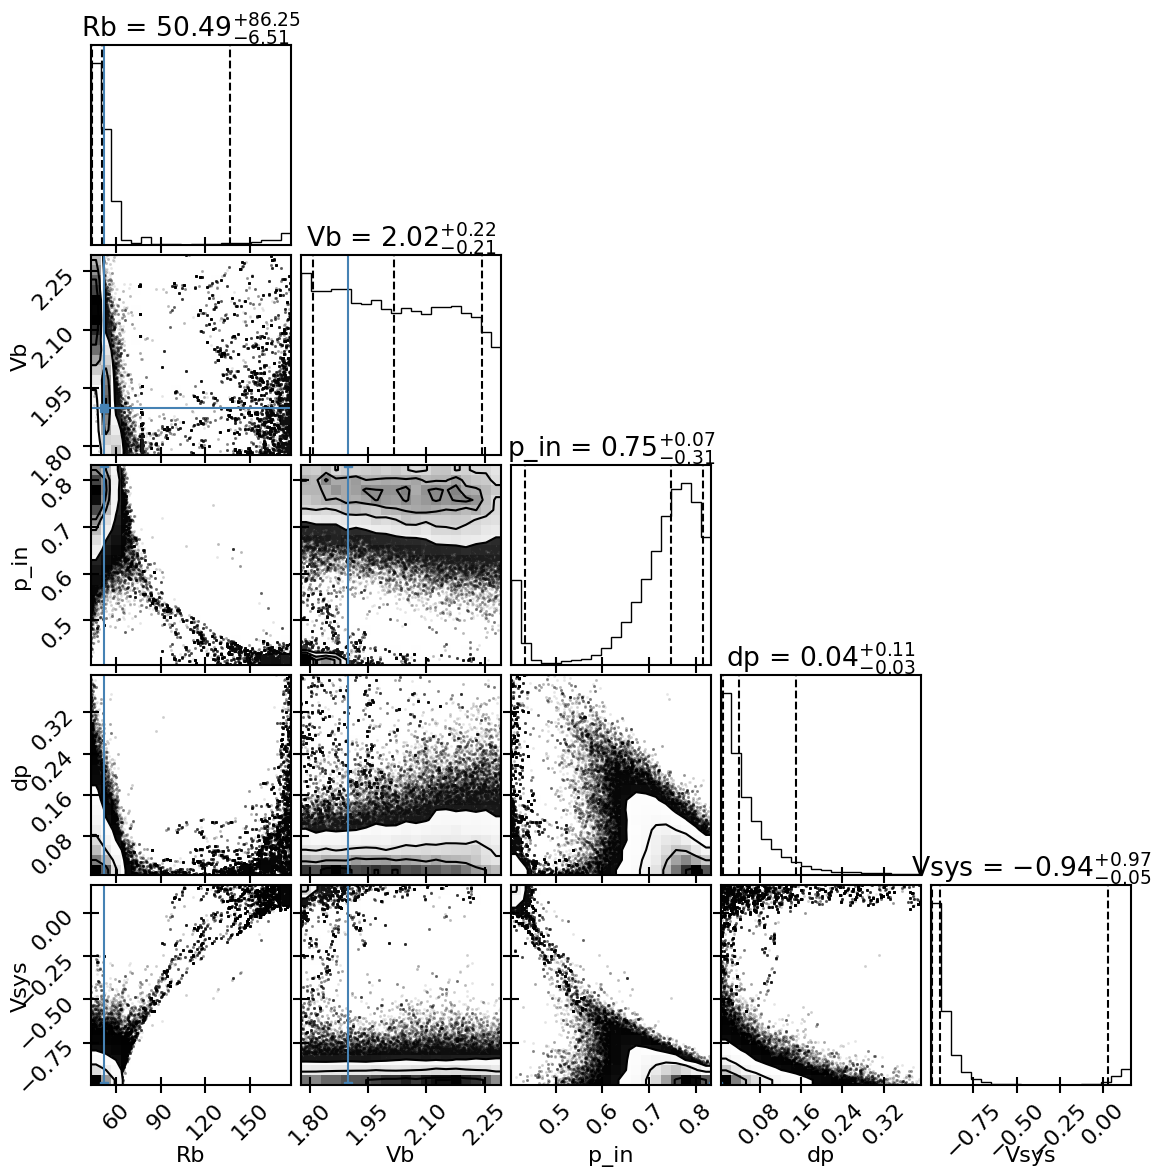

Corner plots in pvanalysis_Oph1_C17O_mTTT_tr3.corner_e.png and pvanalysis_Oph1_C17O_mTTT_tr3.corner_r.png
--- Edge ---
R_b   = 104.40 +/- 20.93 au
V_b   = 2.631 +/- 0.263 km/s
p_in  = 1.007 +/- 0.308
dp    = 0.287 +/- 0.451
v_sys = 1.584 +/- 0.635
r     = 59.75 --- 185.15 au
v     = 0.537 --- 3.900 km/s
M_in  = 1.605 +/- 0.502 Msun
M_out = 0.367 +/- 1.124 Msun
M_b   = 0.911 +/- 0.258 Msun
--- Ridge ---
R_b   = 50.49 +/- 46.38 au
V_b   = 2.017 +/- 0.216 km/s
p_in  = 0.748 +/- 0.191
dp    = 0.040 +/- 0.071
v_sys = 1.359 +/- 0.508
r     = 15.66 --- 180.70 au
v     = -0.202 --- 3.900 km/s
M_in  = 0.463 +/- 0.457 Msun
M_out = 0.124 +/- -0.941 Msun
M_b   = 0.259 +/- 0.244 Msun


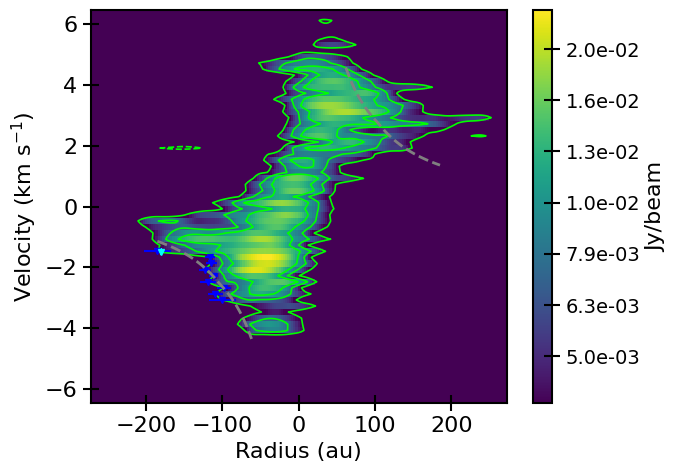

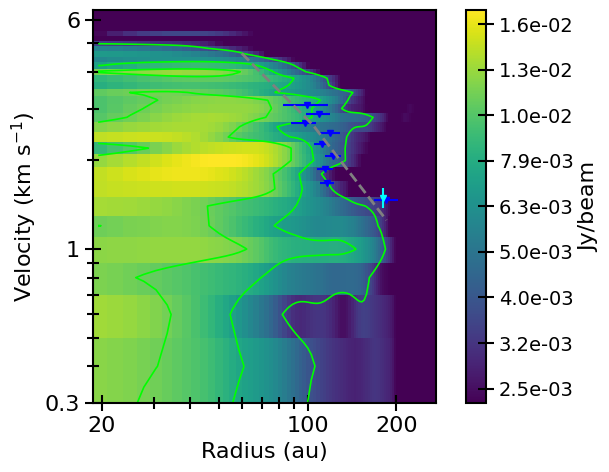

In [11]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 1/Oph1_C17O_pvdiagram.fits'
outname = 'pvanalysis_Oph1_C17O_mTTT_tr3'  # file name header for outputs
incl = 71.  # deg
vsys = 2.3# km/s
dist = 139.  # pc
rms = 1.22e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-250, -10, 0, 250]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-4, 0, 0, 0]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66
'------------------------'

#Corremos Slam
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
fit_result=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)